In [16]:
import os
import sys

import pandas as pd
import numpy as np
import typing

sys.path.append(os.path.abspath("../common"))  # add path to common functions
from evaluate import evaluate_predictions
from preprocess import getdfs, get_char_columns
from preprocess import one_hot_encode
from models import predict_logistic_regression
from models import grid_search_
from models import predict_xgboost

In [17]:
emo_df, emo_val_df = getdfs('emoticon')

In [ ]:
emo_df = get_char_columns(emo_df)
emo_df.head()


,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,label
0,😛,🛐,😻,😑,😣,🙠,🙯,🚼,😒,🙼,😑,🙯,😣,0
1,🛐,😑,😪,😛,🚼,🙯,😣,🚅,😑,🙯,😹,😣,🙼,0
2,😛,🙯,😑,🚡,😣,🚼,🛐,🙲,😣,🙯,🛑,😑,🙼,0
3,😛,🚼,🛐,🙐,😣,🙯,😑,🙪,😑,🙼,🛆,😣,🙯,1
4,🛐,🚟,🚼,😛,🙋,😑,😣,🙯,😹,🙯,😑,😣,🙼,1


In [19]:

repeat_emos = ['🙼', '🛐', '🙯', '😛', '😣', '😑', '🚼']

repeat_emo_code = {
     '🙼' : '284',
     '🛐' : '464', 
     '🙯' : '262',
     '😛' : '15436', 
     '😣' : '614',
     '😑' : '1596', 
     '🚼' : '422'
}

In [20]:
train_df, valid_df = getdfs('text_seq')

In [21]:
def remove_substrings(input_string, substrings):
    """
    Removes all occurrences of substrings from the input string.

    Parameters:
    input_string (str): The string to remove substrings from.
    substrings (list): List of substrings to remove from the input string.

    Returns:
    str: The input string with substrings removed.
    """
    for substring in substrings:
        input_string = input_string.replace(substring, "")
    return input_string


In [22]:
def process_strings ( strs : typing.List[str] )-> typing.List[str]:
    strs = [x.lstrip('0') for x in strs]

    # Example usage
    substrings = repeat_emo_code.values()

    # Remove the substrings
    strs = [remove_substrings(input_string, substrings) for input_string in strs]

    padded_strs = []

    for s in strs:
        if len(s) < 15:
            s = s + '0'*(15-len(s))
        padded_strs.append(s)

    return padded_strs

In [23]:
train_df['input_str'] = process_strings(train_df['input_str'])
valid_df['input_str'] = process_strings(valid_df['input_str'])

In [24]:
num_feat = 15

def get_columns (df) :
    for i in range(num_feat):
        df[f'c_{i}'] = df['input_str'].apply(lambda x : x[i])
    return df.drop(columns = ['input_str'])

train_df = get_columns(train_df)
valid_df = get_columns(valid_df)

In [25]:
for col in train_df.columns[1:] :
    print(train_df[col].nunique())

10
10
10
10
10
10
10
10
10
10
10
10
10
10
2


## One Hot Encoding

In [11]:
# Feature engineering (example: one-hot encoding)
from sklearn.preprocessing import OneHotEncoder
from preprocess import one_hot_encode

train_df, valid_df, y_train, y_valid = one_hot_encode(train_df, valid_df)

(7080, 142) (489, 142)


KeyboardInterrupt: 

In [12]:
y_valid.shape

(489,)

In [13]:
x_train = train_df.values
x_valid = valid_df.values

In [14]:
from models import predict_random_forest, predict_xgboost, predict_mlp, predict_logistic_regression, predict_svc
from evaluate import evaluate_predictions
import matplotlib.pyplot as plt

==========Random Forest==========
              precision    recall  f1-score   support

     Class 0       0.81      0.83      0.82       252
     Class 1       0.81      0.79      0.80       237

    accuracy                           0.81       489
   macro avg       0.81      0.81      0.81       489
weighted avg       0.81      0.81      0.81       489

Accuracy is 0.8098159509202454
==========Random Forest==========
==========XGBoost==========
              precision    recall  f1-score   support

     Class 0       0.89      0.83      0.86       252
     Class 1       0.83      0.89      0.86       237

    accuracy                           0.86       489
   macro avg       0.86      0.86      0.86       489
weighted avg       0.87      0.86      0.86       489

Accuracy is 0.8629856850715747
==========XGBoost==========


/opt/miniconda3/envs/cs771/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:41:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


==========Logistic Regression==========
              precision    recall  f1-score   support

     Class 0       0.70      0.69      0.69       252
     Class 1       0.67      0.68      0.68       237

    accuracy                           0.69       489
   macro avg       0.68      0.69      0.68       489
weighted avg       0.69      0.69      0.69       489

Accuracy is 0.6850715746421268
==========Logistic Regression==========
Number of parameters in the MLP model:  19401
==========MLP==========
              precision    recall  f1-score   support

     Class 0       0.83      0.82      0.83       252
     Class 1       0.81      0.83      0.82       237

    accuracy                           0.82       489
   macro avg       0.82      0.82      0.82       489
weighted avg       0.82      0.82      0.82       489

Accuracy is 0.8241308793456033
==========MLP==========


/opt/miniconda3/envs/cs771/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


==========SVC==========
              precision    recall  f1-score   support

     Class 0       0.81      0.79      0.80       252
     Class 1       0.78      0.80      0.79       237

    accuracy                           0.79       489
   macro avg       0.79      0.79      0.79       489
weighted avg       0.79      0.79      0.79       489

Accuracy is 0.7934560327198364
==========SVC==========


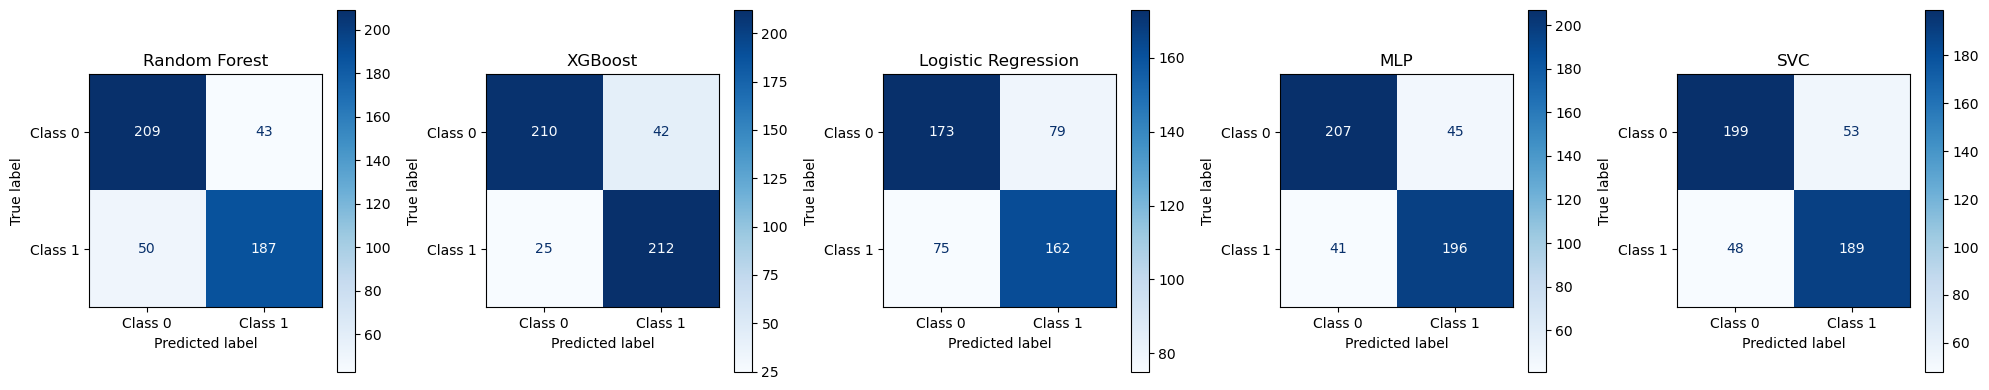

In [15]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # 1 row, 5 columns grid

y_pred_rf = predict_random_forest(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_rf, 'Random Forest', ax=axes[0])

y_pred_xgb = predict_xgboost(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_xgb, 'XGBoost', ax=axes[1])

y_pred_lr = num_feat = 15

def get_columns (df) :
    for i in range(num_feat):
        df[f'c_{i}'] = df['input_str'].apply(lambda x : x[i])
    return df.drop(columns = ['input_str'])

train_df = get_columns(train_df)
valid_df = get_columns(valid_df)predict_logistic_regression(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_lr, 'Logistic Regression', ax=axes[2])

y_pred_mlp = predict_mlp(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_mlp, 'MLP', ax = axes[3])

y_pred_svc = predict_svc(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_svc, 'SVC', ax = axes[4])

plt.tight_layout()
plt.show()

In [16]:
print(train_df)

      0    1    2    3    4    5    6    7    8    9    ...  132  133  134  \
0     0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
7075  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
7076  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
7077  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
7078  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
7079  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

      135  136  137  138  139  140  141  
0     0.0  0.0  0.0  

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim

import torch
import torch.nn as nn

# Define the CNN model
class LightweightCNN(nn.Module):
    def __init__(self, input_dim=142):
        super(LightweightCNN, self).__init__()
        
        # First Convolution Layer: Keep the number of filters small
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=8, kernel_size=3, padding=1)
        
        # Second Convolution Layer (optional for deeper networks)
        self.conv2 = nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
        
        # Max Pooling Layer
        self.pool = nn.MaxPool1d(kernel_size=2)
        
        # Flatten layer
        self.flatten = nn.Flatten()
        
        # Fully Connected Layer (keep it small for a lightweight model)
        self.fc1 = nn.Linear(16 * (input_dim // 2), 8)  # after max pooling, input_dim halves
        
        # Output layer for binary classification
        self.fc2 = nn.Linear(8, 1)
        
        # Sigmoid activation for binary classification
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        # x is of shape (batch_size, input_dim), reshape for Conv1d
        x = x.unsqueeze(1)  # add channel dimension, shape -> (batch_size, 1, input_dim)
        
        # First convolution followed by ReLU and pooling
        x = self.pool(torch.relu(self.conv1(x)))  # shape -> (batch_size, 16, input_dim // 2)
        
        # # Second convolution followed by ReLU
        x = torch.relu(self.conv2(x))  # shape -> (batch_size, 32, input_dim // 2)
        
        # Flatten the output for the fully connected layer
        x = self.flatten(x)  # shape -> (batch_size, 32 * (input_dim // 2))
        
        # Fully connected layers
        x = torch.relu(self.fc1(x))  # shape -> (batch_size, 64)
        
        # Output layer with sigmoid activation for binary classification
        x = self.sigmoid(self.fc2(x))  # shape -> (batch_size, 1)
        
        return x

# Example usage
model = LightweightCNN()

# Print the model summary
print(model)


# Define loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Print model architecture
print(model)


LightweightCNN(
  (conv1): Conv1d(1, 8, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(8, 16, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1136, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
LightweightCNN(
  (conv1): Conv1d(1, 8, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(8, 16, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1136, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [18]:
from torch.utils.data import TensorDataset, DataLoader

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_valid = torch.tensor(x_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32)
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=0)
test_dataset = TensorDataset(x_valid, y_valid)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False, num_workers=0)

print(y_valid)


tensor([1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
        1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
        0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
        1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
        1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
        0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
        1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
        0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
        0., 0., 1., 0., 1., 0., 0., 1., 

In [19]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for sequences, labels in train_loader:
        sequences = sequences.to(device)  # Add a channel dimension
        labels = labels.unsqueeze(1).to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(sequences)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/100], Loss: 0.6466
Epoch [2/100], Loss: 0.6082


KeyboardInterrupt: 

In [20]:

model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences = sequences.to(device)
        labels = labels.unsqueeze(1).to(device)
        
        outputs = model(sequences)
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 71.37%


In [21]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
params

9537

In [22]:
import torch
import torch.nn as nn

# Define the LSTM model
class SmallLSTM(nn.Module):
    def __init__(self, input_dim=142, hidden_dim=32, output_dim=1):
        super(SmallLSTM, self).__init__()
        
        # LSTM Layer
        self.lstm = nn.LSTM(input_size=input_dim, hidden_size=hidden_dim, num_layers=1, batch_first=True)
        
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)
        
        # Sigmoid activation for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Reshape input: (batch_size, input_dim) -> (batch_size, seq_len=1, input_dim)
        x = x.unsqueeze(1)  # Adding a sequence length of 1 for LSTM input
        
        # LSTM layer
        lstm_out, _ = self.lstm(x)  # lstm_out -> (batch_size, seq_len=1, hidden_dim)
        
        # Take only the output from the last time step (in this case, only one time step)
        lstm_out = lstm_out[:, -1, :]  # shape -> (batch_size, hidden_dim)
        
        # Fully connected layer
        out = self.fc(lstm_out)  # shape -> (batch_size, output_dim)
        
        # Apply sigmoid for binary classification
        out = self.sigmoid(out)
        return out

# Function to count parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Instantiate the model
model2 = SmallLSTM(hidden_dim=16)  # Tune hidden_dim to stay under 10k parameters

# Print the model and the parameter count
print(model2)
print(f"Total trainable parameters: {count_parameters(model2)}")


SmallLSTM(
  (lstm): LSTM(142, 16, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Total trainable parameters: 10257


In [24]:
num_epochs = 30  # Set this based on your needs
optimizer = optim.Adam(model2.parameters(), lr=0.001)
for epoch in range(num_epochs):
    model2.train()  # Set model to training mode
    running_loss = 0.0
    
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()  # Zero the parameter gradients
        
        # Forward pass
        # inputs = inputs.unsqueeze(1).to(device)  # Add a sequence length of 1

        outputs = model2(inputs)
        labels = labels.unsqueeze(1).to(device)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Print statistics
        running_loss += loss.item()
        if i % 10 == 9:  # Print every 10 batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss / 10:.4f}')
            running_loss = 0.0

print("Training complete.")


Epoch [1/50], Step [10/3540], Loss: 0.6909
Epoch [1/50], Step [20/3540], Loss: 0.6974
Epoch [1/50], Step [30/3540], Loss: 0.6785
Epoch [1/50], Step [40/3540], Loss: 0.6998
Epoch [1/50], Step [50/3540], Loss: 0.6942
Epoch [1/50], Step [60/3540], Loss: 0.7150
Epoch [1/50], Step [70/3540], Loss: 0.6862
Epoch [1/50], Step [80/3540], Loss: 0.7130
Epoch [1/50], Step [90/3540], Loss: 0.6917
Epoch [1/50], Step [100/3540], Loss: 0.7053
Epoch [1/50], Step [110/3540], Loss: 0.7049
Epoch [1/50], Step [120/3540], Loss: 0.6873
Epoch [1/50], Step [130/3540], Loss: 0.6796
Epoch [1/50], Step [140/3540], Loss: 0.6913
Epoch [1/50], Step [150/3540], Loss: 0.6914
Epoch [1/50], Step [160/3540], Loss: 0.6854
Epoch [1/50], Step [170/3540], Loss: 0.6868
Epoch [1/50], Step [180/3540], Loss: 0.6869
Epoch [1/50], Step [190/3540], Loss: 0.6866
Epoch [1/50], Step [200/3540], Loss: 0.6876
Epoch [1/50], Step [210/3540], Loss: 0.6876
Epoch [1/50], Step [220/3540], Loss: 0.6834
Epoch [1/50], Step [230/3540], Loss: 0.70

In [27]:
model2.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for sequences, labels in test_loader:
        sequences = sequences.to(device)
        labels = labels.unsqueeze(1).to(device)
        outputs = model2(sequences)
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 76.89%
